In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

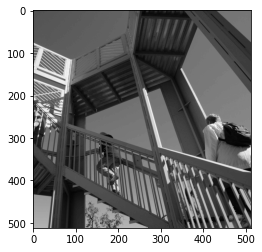

In [27]:
#loading the image from scipy
ascent_image = scipy.misc.ascent()
#showing the image
plt.gray()
plt.imshow(ascent_image)

In [37]:
#initially store the oroginal image in convolved image
convolved_image = np.copy(ascent_image)
x_size = convolved_image.shape[0]
y_size = convolved_image.shape[1]
#defining the filter/kernel
filter = [[1,0,-1], [1,0,-1], [1,0,-1]]

In [47]:
#convolving the image
for x in range(1, x_size-1):
  for y in range(1, y_size-1):
    convolve = 0.0
    convolve = convolve + (ascent_image[x-1, y-1] * filter[0][0])
    convolve = convolve + (ascent_image[x-1, y] * filter[0][1])
    convolve = convolve + (ascent_image[x+1, y+1] * filter[0][2])

    convolve = convolve + (ascent_image[x, y-1] * filter[1][0])
    convolve = convolve + (ascent_image[x, y] * filter[1][1])
    convolve = convolve + (ascent_image[x, y+1] * filter[1][2])

    convolve = convolve + (ascent_image[x+1, y-1] * filter[2][0])
    convolve = convolve + (ascent_image[x+1, y-1] * filter[2][1])
    convolve = convolve + (ascent_image[x+1, y-1] * filter[2][2])

    if(convolve<0):
        convolve=0
    if(convolve>255):
        convolve=255

    convolved_image[x, y] = convolve

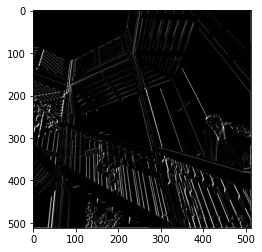

In [48]:
plt.gray()
plt.imshow(convolved_image)

In [54]:
# convolved_image[0, 0] = ascent_image[0, 0]

83

In [73]:
# convolved_image.shape = 512, 512
#apply max pooling of 2x2 and stride of 2
pool_x_size = int(np.floor(((x_size - 2)/2)+1))
pool_y_size = int(np.floor(((y_size - 2)/2)+1))

#initialize a new pooled image 2D array with all zeros
pooled_image = np.zeros([pool_x_size, pool_y_size])


for x in range(0, x_size, 2):
  for y in range(0, y_size, 2):
    pooled_arr = []
    pooled_arr.append(convolved_image[x, y])
    pooled_arr.append(convolved_image[x+1, y])
    pooled_arr.append(convolved_image[x, y+1])
    pooled_arr.append(convolved_image[x+1, y+1])
    max_val = max(pooled_arr)
    pooled_image[int(x/2), int(y/2)] = max_val


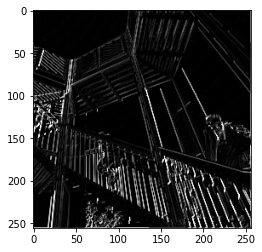

In [74]:
plt.imshow(pooled_image)